# Titanic Survival Prediction — CodSoft Task 1

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import joblib


## Load Dataset

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis (EDA)

### Survival Count by Gender

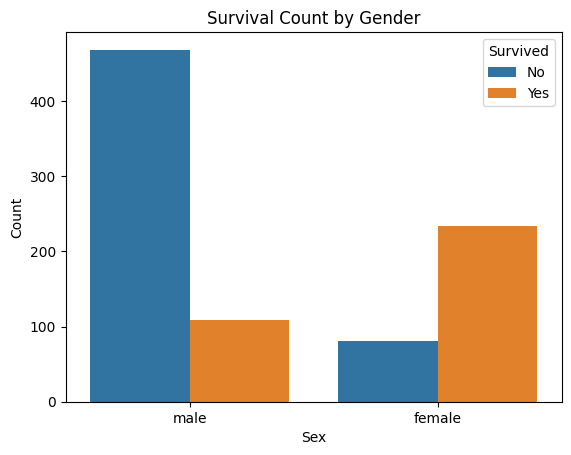

In [3]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival Count by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

### Survival Count by Passenger Class

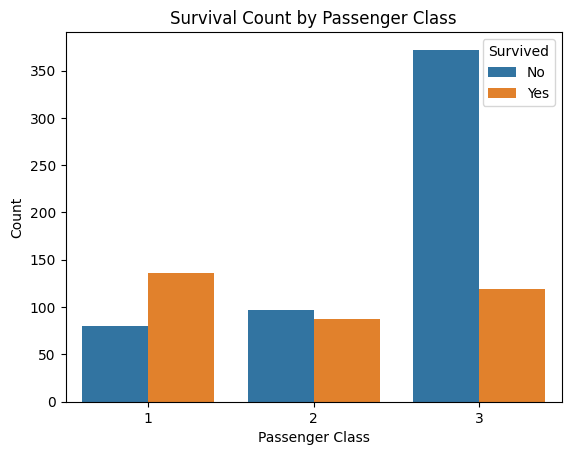

In [4]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

### Age Distribution by Survival

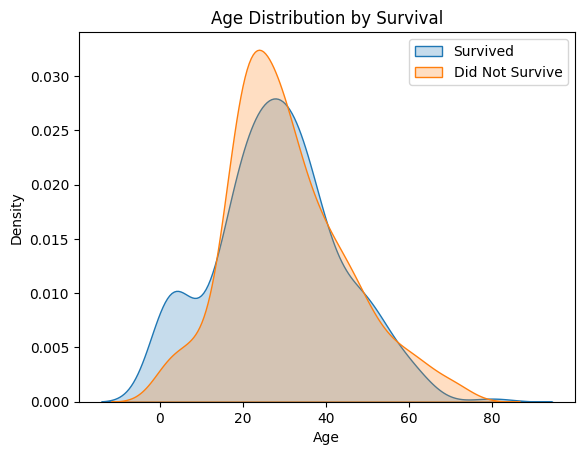

In [5]:
sns.kdeplot(data=df[df['Survived']==1]['Age'], label='Survived', fill=True)
sns.kdeplot(data=df[df['Survived']==0]['Age'], label='Did Not Survive', fill=True)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.legend()
plt.show()

### Fare Distribution by Survival

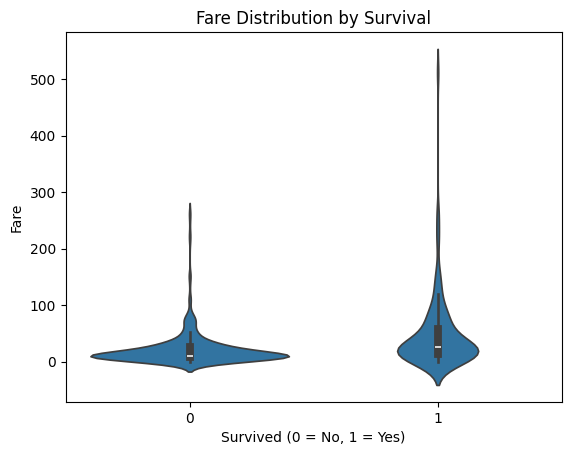

In [6]:
sns.violinplot(data=df, x='Survived', y='Fare')
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()

### Correlation Heatmap

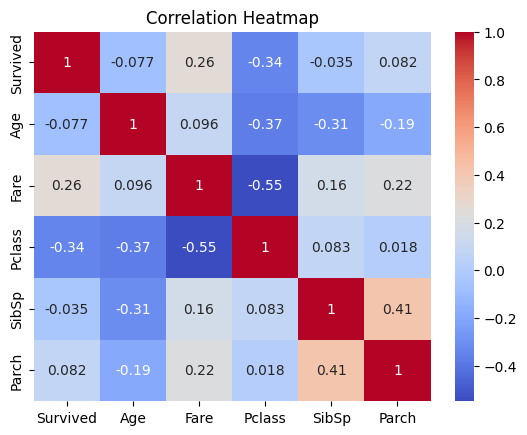

In [7]:
corr = df[['Survived', 'Age', 'Fare', 'Pclass', 'SibSp', 'Parch']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Preprocessing

In [8]:
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

## Train-Test Split

In [9]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling for Logistic Regression & k-NN


In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression

In [11]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, lr_pred))
print("\nClassification Report:\n", classification_report(y_test, lr_pred))

=== Logistic Regression ===
Accuracy: 0.8044692737430168

Confusion Matrix:
 [[89 16]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



## k-NN Classifier (k=5)

In [12]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)

print("=== k-NN (k=5) ===")
print("Accuracy:", accuracy_score(y_test, knn_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, knn_pred))
print("\nClassification Report:\n", classification_report(y_test, knn_pred))

=== k-NN (k=5) ===
Accuracy: 0.8044692737430168

Confusion Matrix:
 [[90 15]
 [20 54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



## Random Forest Classifier (Unscaled)

In [13]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

=== Random Forest ===
Accuracy: 0.8212290502793296

Confusion Matrix:
 [[92 13]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



## Save Final Model (Random Forest)

In [14]:
joblib.dump(rf_model, "titanic_random_forest_model.pkl")

['titanic_random_forest_model.pkl']